In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

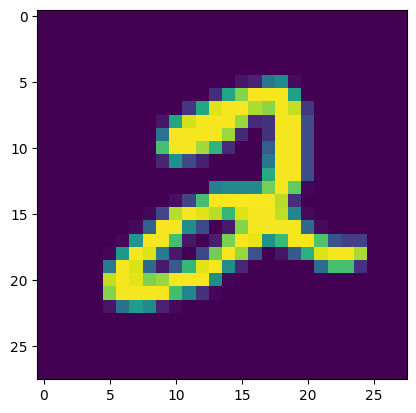

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5])


In [12]:
X_train=X_train/255
X_test=X_test/255

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [30]:
from keras.api._v2.keras import activations
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [32]:
#from keras.engine.training import optimizer
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam")

In [33]:
history_model=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2925 - val_loss: 0.1548
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1206 - val_loss: 0.1100
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0827 - val_loss: 0.1098
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0622 - val_loss: 0.1015
Epoch 5/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0488 - val_loss: 0.1027
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0399 - val_loss: 0.0912
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0333 - val_loss: 0.1086
Epoch 8/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0261 - val_loss: 0.0999
Epoch 9/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0235 - val_loss: 0.1000
Epoch 10/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.018

In [34]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [35]:
y_pred=y_prob.argmax(axis=1)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_pred)

0.9748

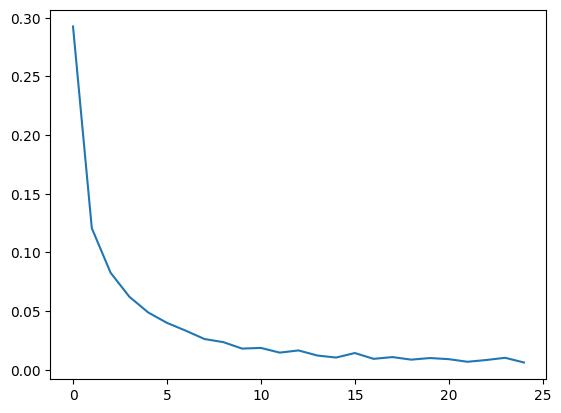

In [39]:
plt.plot(history_model.history["loss"])

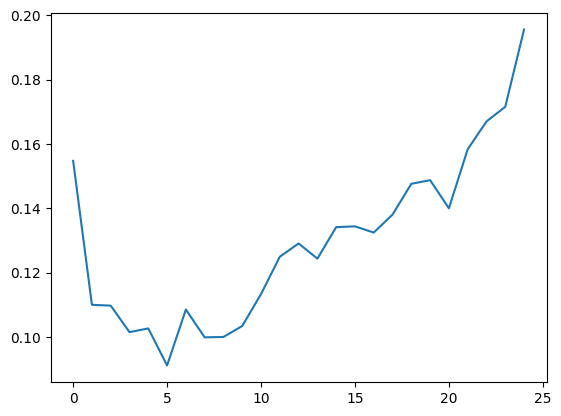

In [41]:
plt.plot(history_model.history["val_loss"])

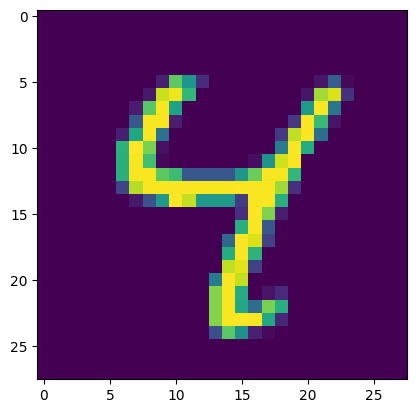

In [44]:
plt.imshow(X_test[6])

In [47]:
model.predict(X_test[6].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 42ms/step


array([4])

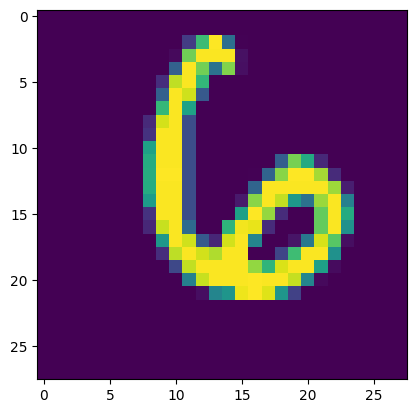

In [55]:
plt.imshow(X_test[88])

In [54]:
model.predict(X_test[88].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 34ms/step


array([6])